<a href="https://colab.research.google.com/github/farahwadya/advertiding-impact-on-sales/blob/main/FPrj__advertiding_impact_on_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [ ]:
import pandas as pd # to deal with data
import seaborn as sns # for charts
import numpy as np #to deal with data as an array
import matplotlib.pyplot as plt # for charts
from sklearn.linear_model import LinearRegression # model
from sklearn.model_selection import train_test_split # feature engineering
from sklearn.metrics import mean_squared_error, r2_score #for model evaluation

In [ ]:
import os

path = r'D:\round3_p2\data mining-practical'
print("Files in folder:")
print(os.listdir(path))

Files in folder:
['advertising_and_sales_clean.csv', 'Data mining, T01, Farah Alwadya120220524.pdf', 'DtM - FPrj- Farah Alwadya 120220524.docx', '~$M - FPrj- Farah Alwadya 120220524.docx', '~WRL2235.tmp', 'تقرير.pub']


## Uploading dataset

In [ ]:
df = pd.read_csv(r'advertising_and_sales_clean.csv')
pd.read_csv('advertising_and_sales_clean.csv')

,tv,radio,social_media,influencer,sales
0,16000,6566.23,2907.98,Mega,54732.76
1,13000,9237.76,2409.57,Mega,46677.90
2,41000,15886.45,2913.41,Mega,150177.83
3,83000,30020.03,6922.30,Mega,298246.34
4,15000,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4544,71000,17534.64,1940.87,Macro,253610.41
4545,42000,15966.69,5046.55,Micro,148202.41
4546,42000,NaN,5046.55,Micro,148202.41
4547,42000,15966.69,5046.55,micro,148202.41


## Dataset description

In [ ]:
df.shape #(n-rows, n- columns)

(4549, 5)

In [ ]:
df.describe()

,tv,radio,social_media,sales
count,4549.000000,4547.000000,4549.000000,4549.000000
mean,54054.957133,18157.051289,3324.609173,192384.175645
std,26098.168390,9662.251378,2210.967134,92996.116569
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.970000,1532.240000,112493.110000
50%,53000.000000,17855.850000,3056.300000,188944.880000
75%,77000.000000,25634.160000,4807.660000,272250.110000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4549 non-null   int64  
 1   radio         4547 non-null   float64
 2   social_media  4549 non-null   float64
 3   influencer    4549 non-null   object 
 4   sales         4549 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 177.8+ KB


In [ ]:
df.head(4) #display the first 4 rows

,tv,radio,social_media,influencer,sales
0,16000,6566.23,2907.98,Mega,54732.76
1,13000,9237.76,2409.57,Mega,46677.90
2,41000,15886.45,2913.41,Mega,150177.83
3,83000,30020.03,6922.30,Mega,298246.34


In [ ]:
df.tail(4) # display the last 4 rows

,tv,radio,social_media,influencer,sales
4545,42000,15966.69,5046.55,Micro,148202.41
4546,42000,NaN,5046.55,Micro,148202.41
4547,42000,15966.69,5046.55,micro,148202.41
4548,42000,NaN,5046.55,Micro,148202.41


## Create a copy of the dataset

In [ ]:
temp = df.copy()

## Data Cleaning

## missing data

### 1.1 Check for missing data

In [ ]:
missing = temp.isnull().sum()
print(f'missing values :\n{missing}')

missing values :
tv              0
radio           2
social_media    0
influencer      0
sales           0
dtype: int64


### 1.2 Delete missing data

In [ ]:
if missing.sum() > 0:
    temp = temp.dropna()
    print("\nrows with missing value has been deleted\n")
else:
    print("\n no missing value has been found\n")


rows with missing value has been deleted



## Duplicates

### 2.1 Chick for duplicates

In [ ]:
duplicates = temp.duplicated().sum()  # show the sum of duplicated dataا
print(f"sum of duplicates = {duplicates}")

sum of duplicates = 0


### 2.2 Delete duplicates if found

In [ ]:
if duplicates > 0:
    data = data.drop_duplicates()
    print("duplicated rows has been deleted successfully")
else:
    print("no duplicated rows found")

no duplicated rows found


## inconsistent data

### 3.1 checking for inconsistent data

In [ ]:
columns = ["tv", "radio", "social_media", "influencer", "sales"]

for col in columns:
    print(f"ا '{col}':")
    print(temp[col].value_counts())

ا 'tv':
tv
43000    70
40000    67
47000    65
21000    64
34000    64
         ..
76000    36
81000    35
91000    34
71000    32
57000    31
Name: count, Length: 91, dtype: int64
ا 'radio':
radio
15966.69    2
1530.85     2
21022.86    1
15360.43    1
15728.23    1
           ..
7771.73     1
8922.97     1
20724.82    1
25196.40    1
30364.94    1
Name: count, Length: 4545, dtype: int64
ا 'social_media':
social_media
5046.55    2
5653.70    2
3196.67    2
392.28     2
651.58     2
          ..
5331.90    1
3138.41    1
2075.97    1
2254.83    1
5001.77    1
Name: count, Length: 4532, dtype: int64
ا 'influencer':
influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
micro       1
Name: count, dtype: int64
ا 'sales':
sales
148202.41    2
258375.43    2
212933.90    1
175933.78    1
166972.02    1
            ..
143856.23    1
314829.54    1
209364.53    1
121813.87    1
259695.65    1
Name: count, Length: 4545, dtype: int64


### 3.2 Sloving inconsistency problem

In [ ]:
#capitaliza the first letter
temp['influencer'] = temp['influencer'].str.capitalize()
#show results
print(temp['influencer'].unique())

['Mega' 'Micro' 'Nano' 'Macro']


## Data exploration

### 1. Histogram display the distribution of each numeric attribute

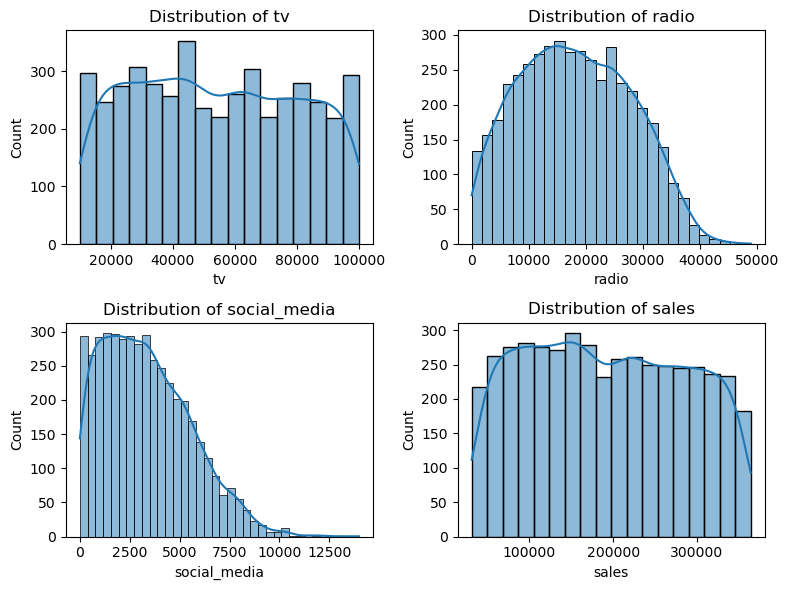

In [ ]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(['tv', 'radio', 'social_media', 'sales']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# ارجعي لشات يفسرلك الكود والرسمة

### 2. Scatter plot show the relationship between channels and sales

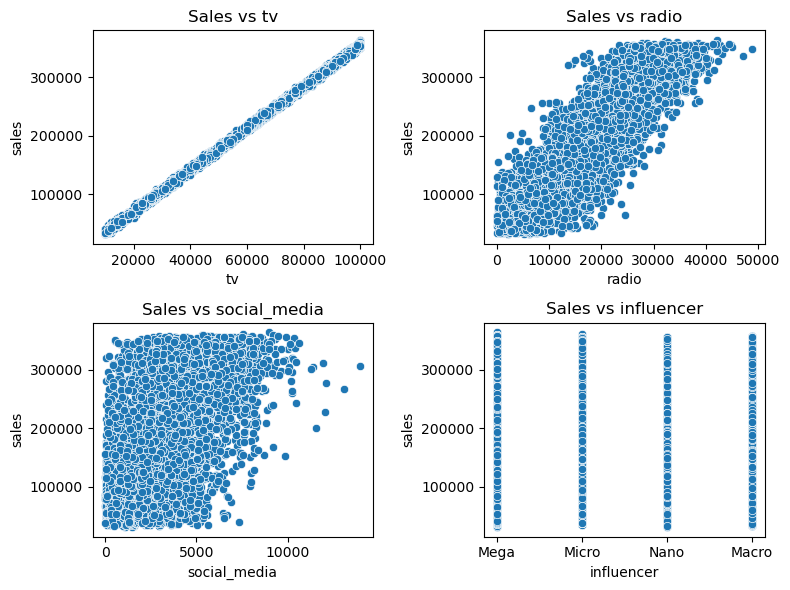

In [ ]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(['tv', 'radio', 'social_media' , 'influencer']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=temp, x=col, y='sales')
    plt.title(f'Sales vs {col}')
plt.tight_layout()
plt.show()

### Box plot display the relation between the type of influencer and sales

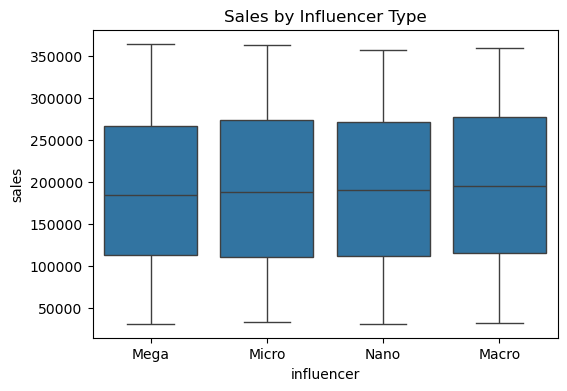

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=temp, x='influencer', y='sales')
plt.title('Sales by Influencer Type')
plt.show()

### 4. Heatmap show the correlation

<Axes: >

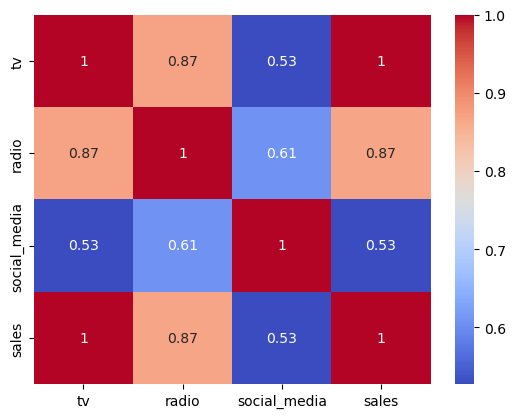

In [ ]:
cor = temp.select_dtypes(include='number').corr() #  only numeric data can be shown
sns.heatmap(cor, annot=True, cmap='coolwarm')

## Feature engineering

### Trun influencer attribute into numeric column instead of text

In [ ]:
print(temp['influencer'].isnull().sum())
# can't include null values before converting

0


In [ ]:
#Convert text to string
temp['influencer'] = temp['influencer'].map({'Nano': 0, 'Micro': 1, 'Mega': 2, 'Macro' : 3})
print(temp['influencer'].isnull().sum())  # must be zero --> 0

X = temp[['tv', 'radio', 'social_media', 'influencer']] # independent variables
y = temp['sales'] # dependant variable

0


## Modeling

### 1. Splitting data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test = 20% from the whole set
# traingig = 80% from the whole data set

### 2. Creating model and traing it

In [ ]:
# creating model
model = LinearRegression()
#Fitting data into model
model.fit(X_train, y_train)

LinearRegression()

### 3. predicting values

In [ ]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

## Evaluating the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Model Accuracy (R² Percentage): {:.2f}%".format(r2 * 100))

#Display the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(f'\n{coefficients}')

Mean Squared Error (MSE): 8293736.260216529
R² Score: 0.9990038994825026
Model Accuracy (R² Percentage): 99.90%

        Feature  Coefficient
0            tv     3.565966
1         radio    -0.010333
2  social_media    -0.002764
3    influencer    17.603751


### Using the model for prediction: Predicting Sales for New Advertising Data



In [ ]:
new_data = pd.DataFrame([[2000, 500, 1000, 1]], columns=['tv', 'radio', 'social_media', 'influencer'])

# Using model to predict new value
predicted_sales = model.predict(new_data)

print("Expected Sales for the new campaign:", round(predicted_sales[0], 2))

Expected Sales for the new campaign: 6971.35


## Visualization

### 1. Plot Actual vs Predicted Sales

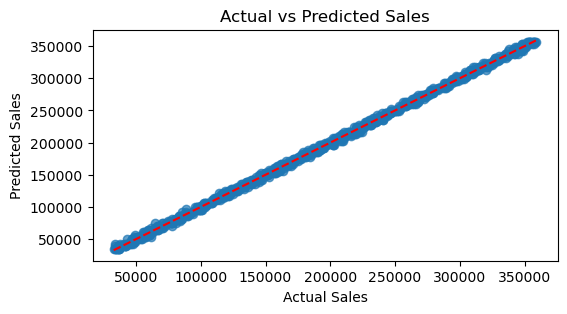

In [ ]:
import matplotlib.pyplot as plt
# Predict sales on test set
y_pred = model.predict(X_test)
plt.figure(figsize=(6,3))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # الخط المثالي
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

### 2. Residual Plot (Actual - Predicted)


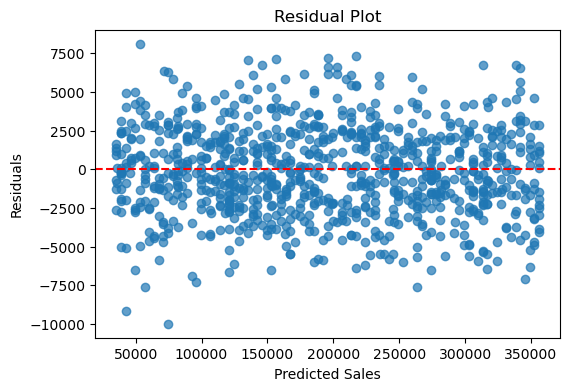

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Feature Coefficients Bar Plot (Linear Regression)

tv: 3.5659662951102318
radio: -0.010333306390176482
social_media: -0.0027641053836233733
influencer: 17.603750879959108


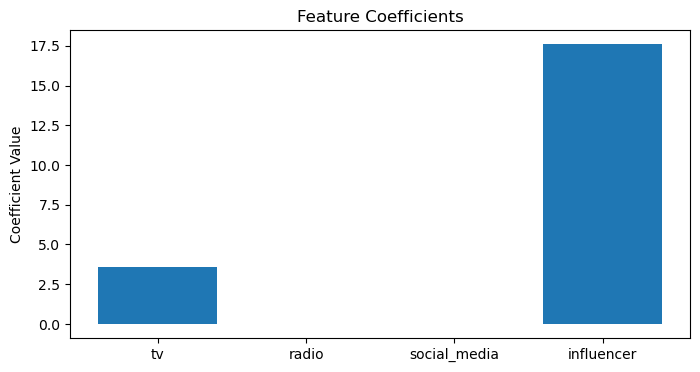

In [ ]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
import numpy as np

features = X.columns
coefficients = model.coef_

plt.figure(figsize=(8,4))
plt.bar(features, coefficients) # x, y values
plt.title('Feature Coefficients') #title of the chart
plt.ylabel('Coefficient Value') # y label
plt.show()

### Correlation Analysis Between Features and Target Variable

                    tv     radio  social_media  influencer     sales
tv            1.000000  0.869156      0.527561    0.013768  0.999497
radio         0.869156  1.000000      0.606255    0.010718  0.868635
social_media  0.527561  0.606255      1.000000    0.020611  0.527317
influencer    0.013768  0.010718      0.020611    1.000000  0.014113
sales         0.999497  0.868635      0.527317    0.014113  1.000000


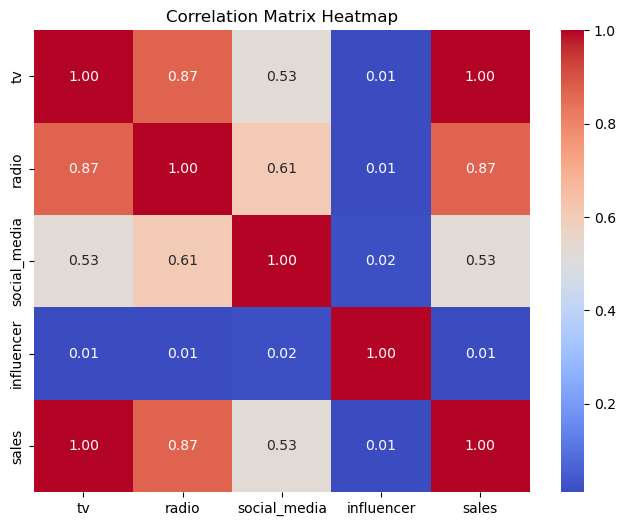

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculating correlation matrix
corr_matrix = temp[['tv', 'radio', 'social_media', 'influencer', 'sales']].corr()

#printing correlation matrix
print(corr_matrix)

# figuring correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()